In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import random
plt.style.use("ggplot")

In [2]:
data1 =pd.read_csv("processed_individual_cases_Sep20th2020.csv")

In [3]:
data2 =pd.read_csv("processed_location_Sep20th2020.csv")

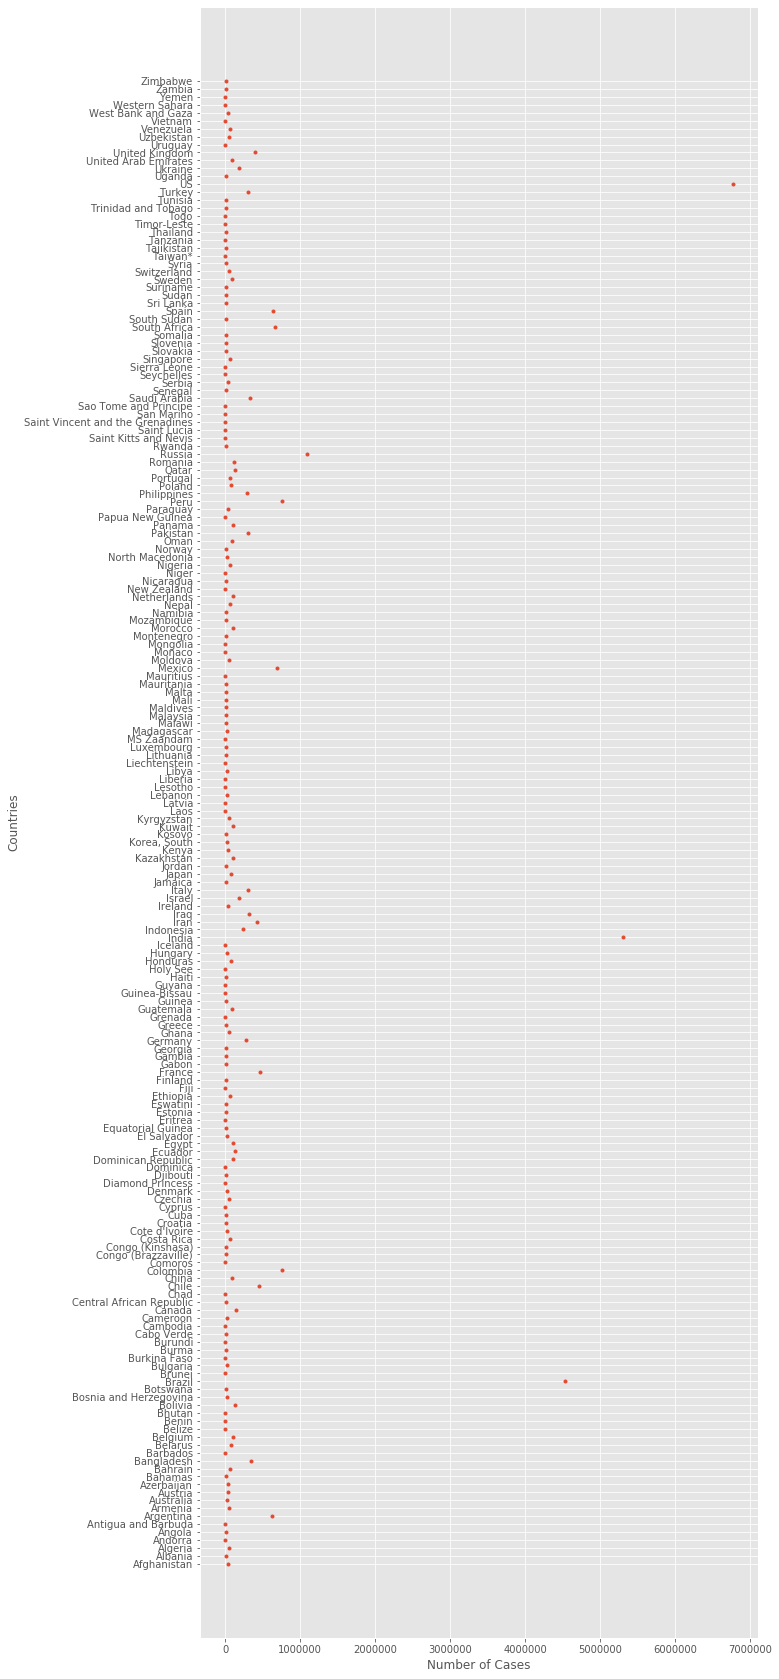

In [4]:
#Plotting number of confirmed cases by country
groupByCountry= data2.groupby(by=["Country_Region"]).sum()
plt.figure(figsize=(10, 30))
plt.xlabel('Number of Cases')
plt.ylabel('Countries')
plt.plot(groupByCountry['Confirmed'],groupByCountry.index,'.')
plt.savefig('confirmedCases_byCountry.jpg')

# AGE FILTERING

In [5]:
#Age is defined in 362 different patterns
len(np.unique(data1['age'].astype(str)))
np.unique(data1['age'].astype(str))

#First we will try to solve the pattern which contains age in shape 'X-Y'
agefiltered= data1['age'].astype(str)

def getFilter1(df):
    return re.findall('\d+',df)

arrayData=  agefiltered.apply(getFilter1)

#Now we randomly assign the age for pattern X-Y between X and Y
for i in range(len(arrayData)):
    if(len(arrayData[i])>1):
        value1= int(arrayData[i][0])
        value2= int(arrayData[i][1])
        if(value2!=0 and value2>=value1):
            randomAge= random.randint(value1, value2)
            data1['age'][i]=str(randomAge)
            

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [6]:
#Now we are still left with different pattern. We we do it manually.
for i in range(len(data1)):
    if (data1['age'][i]=='18-') :
        data1['age'][i]=str(random.randint(1, 18))
    elif (data1['age'][i]=='21-') :
        data1['age'][i]=str(random.randint(1, 21))
    elif (data1['age'][i]=='55-') :
        data1['age'][i]=str(random.randint(1, 55))
    elif (data1['age'][i]=='65-') :
        data1['age'][i]=str(random.randint(1, 65))
    elif (data1['age'][i]=='80+'):
        data1['age'][i]=str(random.randint(80, 100))
    elif (data1['age'][i]=='80-'):
        data1['age'][i]=str(random.randint(60, 80))
    elif (data1['age'][i]=='85+'):
        data1['age'][i]=str(random.randint(85, 100))
    elif(data1['age'][i]=='60-') :
        data1['age'][i]=str(random.randint(40, 60))
    elif (data1['age'][i]=='90+'):
        data1['age'][i]=str(random.randint(90, 110))   

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A 

In [7]:
#Now we will do our last filter which contains 'months'
for i in range(len(data1)):
    if (data1['age'][i]=='11 month') :
        data1['age'][i]=str(11/12)
    elif (data1['age'][i]=='18 month') :
        data1['age'][i]=str(18/12)
    elif (data1['age'][i]=='4 months') :
        data1['age'][i]=str(4/12)
    elif (data1['age'][i]=='5 month') :
        data1['age'][i]=str(5/12)
    elif (data1['age'][i]=='6 months'):
        data1['age'][i]=str(6/12)
    elif (data1['age'][i]=='8 month'):
        data1['age'][i]=str(8/12)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be se

In [8]:
#data1['age']=data1['age'].astype(str).astype(float)

In [12]:
data2

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,Afghanistan,2020-09-20 04:22:56,33.939110,67.709953,38919,1437,32576,4906.0,Afghanistan,99.976005,3.692284
1,NaN,Albania,2020-09-20 04:22:56,41.153300,20.168300,12226,358,6888,4980.0,Albania,424.838418,2.928186
2,NaN,Algeria,2020-09-20 04:22:56,28.033900,1.659600,49623,1665,34923,13035.0,Algeria,113.162645,3.355299
3,NaN,Andorra,2020-09-20 04:22:56,42.506300,1.521800,1564,53,1164,347.0,Andorra,2024.202420,3.388747
4,NaN,Angola,2020-09-20 04:22:56,-11.202700,17.873900,3901,147,1445,2309.0,Angola,11.869312,3.768265
...,...,...,...,...,...,...,...,...,...,...,...,...
3949,NaN,West Bank and Gaza,2020-09-20 04:22:56,31.952200,35.233200,35003,253,23446,11304.0,West Bank and Gaza,686.142828,0.722795
3950,NaN,Western Sahara,2020-09-20 04:22:56,24.215500,-12.885800,10,1,8,1.0,Western Sahara,1.674116,10.000000
3951,NaN,Yemen,2020-09-20 04:22:56,15.552727,48.516388,2026,585,1221,220.0,Yemen,6.792738,28.874630
3952,NaN,Zambia,2020-09-20 04:22:56,-13.133897,27.849332,14070,330,13365,375.0,Zambia,76.534126,2.345416


# BELOW CODE WILL HELP DURING MERGE

In [13]:
#For province value which are left 'nan' or 'State Unassigned' will be assigned the value of their country.
for i in range(len(data1)):
    if(str(data1['province'][i])=='nan' or  data1['province'][i]=='State Unassigned'):
        data1['province'][i]=data1['country'][i]
#Same approch for data2
for i in range(len(data2)):
    if(str(data2['Country_Region'][i])=='nan'):
        data2['Country_Region'][i]=data2['Province_State'][i]

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [14]:
#Remove Two rows whose all data is NAN
data1=data1[data1['province'].notnull()]
data1=data1.reset_index(drop=True)

In [15]:
data1['age']=data1['age'].astype(str).astype(np.float)
removedNanData = data1[data1['age'].notnull()].reset_index(drop=True)
groupByProvince= removedNanData.groupby(by=["province"]).mean()

In [16]:
#Setting the age value by mean of that province which it belongs to.
for i in range(len(data1)):
    if str(data1['age'][i])== 'nan':
        for j in range(len(groupByProvince)):
            if(data1['province'][i]==groupByProvince.index[j]):
                data1['age'][i]=groupByProvince['age'][j]
                break;

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
#There is still age left which who does not have mean of province then thet will be assigned mean value of their country.
data1[data1['age'].isnull()].reset_index(drop=True)
removedNanData = data1[data1['age'].notnull()].reset_index(drop=True)
groupByCountry= removedNanData.groupby(by=["country"]).mean()

In [18]:
#Left over age 'nan' values will be assigned by mean of country.
for i in range(len(data1)):
    if(str(data1['age'][i])=='nan'):
        for j in range(len(groupByCountry)):
            if (data1['country'][i]==groupByCountry.index[j]):
                data1['age'][i]=groupByCountry['age'][j]    

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
#Last filter for outliers where ages are greater than 150 which is not possible. 
for i in range(len(data1)):
    if(str(data1['age'][i])=='nan' or data1['age'][i]>150):
        data1['age'][i]=random.randint(0, 95)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


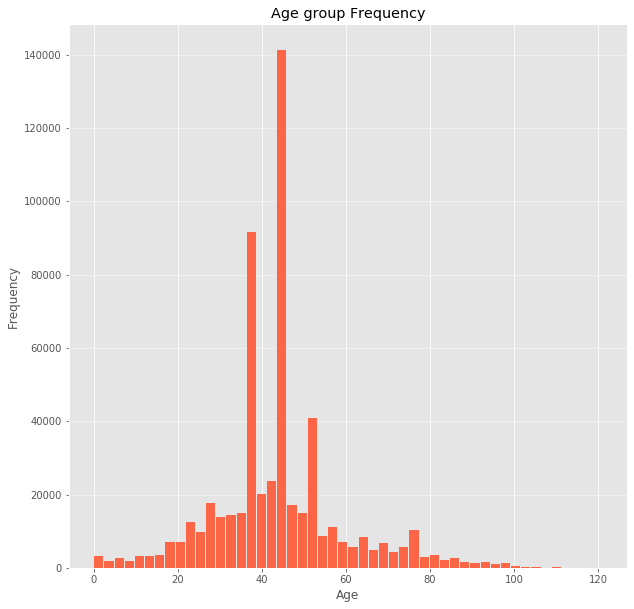

In [20]:
#Age histogram plot
plt.figure(figsize=(10, 10))
plt.hist(data1['age'], bins = 50,rwidth=0.9,alpha=0.9, color='#FF5733')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y',alpha=0.5)
plt.title('Age group Frequency')
plt.savefig('AgeFrequency.jpg')

# FILTERING SEX 

In [21]:
removedNanData = data1[data1['sex'].notnull()].reset_index(drop=True)
groupByProvince= removedNanData.groupby(by=["province"]).mean()

In [24]:
x=data1.groupby(['province','sex'])
data1['sex']=data1['sex'].astype(str).count()
data1['sex']=data1['sex'].astype(str)

In [25]:
#Sex value is not defined then the ratio is used for that province to set 'nan' value to male or female
for i in range(len(data1)):
    if(str(data1['sex'][i])=='nan'):
        for j in range(len(x)):
            if(str(data1['province'])==x.index[j][0]):
                if(x[i]>0 and x[i+1]>0):
                    maleRatio= (x[i]/(x[i]+x[i+1])) *100
                    randomValue= random.randint(1, 100)
                    if(randomValue<maleRatio):
                        data1['sex'][i]='male'
                    else:
                        data1['sex'][i]='female'

# FILTERING FOR INCIDENCE RATE

In [26]:
#Filtering of insidence_Rate
#removedNanData = data1[data1['sex'].notnull()].reset_index(drop=True)
groupByProvince= data2.groupby(by=["Province_State"]).mean()
data2[data2['Incidence_Rate'].isnull()]
for i in range(len(data2)):
    if(str(data2['Incidence_Rate'][i])=='nan' ):
        for j in range(len(groupByProvince)) :
            if data2['Province_State'][i]==groupByProvince.index[j]:
                data2['Incidence_Rate'][i]=groupByProvince['Incidence_Rate'][j]
     

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [27]:
#Now remaining values are filtered by taking country in account
groupByCountry= data2.groupby(by=["Country_Region"]).mean()
data2[data2['Incidence_Rate'].isnull()]
for i in range(len(data2)):
    if(str(data2['Incidence_Rate'][i])=='nan' ):
        for j in range(len(groupByCountry)) :
            if data2['Country_Region'][i]==groupByCountry.index[j]:
                data2['Incidence_Rate'][i]=groupByCountry['Incidence_Rate'][j]

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
#Filtering of Case-Fatality_Ratio
for i in range(len(data2)):
    if(str(data2['Case-Fatality_Ratio'][i])=='nan' ):
        for j in range(len(groupByProvince)) :
            if data2['Province_State'][i]==groupByProvince.index[j]:
                data2['Case-Fatality_Ratio'][i]=groupByProvince['Case-Fatality_Ratio'][j]

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
#Manually filtering remaining data
str(data2['Incidence_Rate'][0])=='nan'
data2[data2['Case-Fatality_Ratio'].isnull()]
data2= data2[data2.index!=3071].reset_index(drop=True)
data2= data2[data2.index!=251].reset_index(drop=True)
data2= data2[data2.index!=3941].reset_index(drop=True)
data2= data2[data2.index!=594].reset_index(drop=True)
data2= data2[data2.index!=265].reset_index(drop=True)
data2= data2[data2.index!=67].reset_index(drop=True)
data2.loc[data2.index==175,'Incidence_Rate']= float('nan')
data2.loc[data2.index==359,'Incidence_Rate']= float('nan')

In [30]:
#Giving latitude and longitude based on province
for i in range(len(data2)):
    if(str(data2['Lat'][i])=='nan' or str(data2['Long_'][i])=='nan' ):
        for j in range(len(groupByProvince)) :
            if data2['Province_State'][i]==groupByProvince.index[j]:
                data2['Lat'][i]=groupByProvince['Lat'][j]
                data2['Long_'][i]=groupByProvince['Long_'][j]

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [31]:
#Latitude and Longitude based on country if Province is not there, we need to be near our main region
for i in range(len(data2)):
    if(str(data2['Lat'][i])=='nan' or str(data2['Long_'][i])=='nan' ):
        for j in range(len(groupByCountry)) :
            if data2['Country_Region'][i]==groupByCountry.index[j]:
                data2['Lat'][i]=groupByCountry['Lat'][j]
                data2['Long_'][i]=groupByCountry['Long_'][j]
                

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [32]:
#We have no idea baout the rest 4, so we used unknown here'
data2[data2['Lat'].isnull()]
data2.loc[data2.index==175,'Lat']= float('nan')
data2.loc[data2.index==175,'Long_']= float('nan')
data2.loc[data2.index==359,'Lat']= float('nan')
data2.loc[data2.index==359,'Long_']=float('nan')

In [33]:
#We calculated that only didn't have anything on active cases, and all recovered. Safe to say that 0 are active.
data2[data2['Active'].isnull()]
data2.loc[data2.index==95,'Active']= np.float(0)



In [34]:
for i in range(len(data2)):
    if(str(data2['Province_State'][i])=='nan' or  data2['Province_State'][i]=='State Unassigned'):
        data2['Province_State'][i]=data2['Country_Region'][i]

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
for i in range(len(data1)):
    if(str(data1['date_confirmation'][i])=='nan'):
        data1['date_confirmation'][i] = 'Unknown'

for i in range(len(data1)):
    if(str(data1['additional_information'][i])=='nan'):
        data1['additional_information'][i] = 'Unknown'

for i in range(len(data1)):
    if(str(data1['source'][i])=='nan'):
        data1['source'][i] = 'Unknown'

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellA

# FINDING OUTLIERS

In [36]:
for i in range(len(data1)):
    if str(data1['age'][i]) != 'Unknown' :
        if float(data1['age'][i])  > 150 :
            print(i,"  Value hai  ",data1['age'][i])
#plt.figure(figsize=(20,20))            
#plt.plot(data2[''])  
#data2[data2.index==736]
#print(data2['Incidence_Rate'][987])
#data2['Incidence_Rate'][1048]
#data2[3272]

# ISOLATION TREE FOR OUTLIERS

In [37]:
#model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1),max_features=1.0)
#model.fit(data2[['Confirmed']])
#data2[data2['Incidence_Rate'].isnull()]

In [38]:
#data2['scores']=model.decision_function(data2[['Confirmed']])
#data2['anomaly']=model.predict(data2[['Confirmed']])

In [39]:
#anomaly=data2.loc[data2['anomaly']==-1]
#anomaly_index=list(anomaly.index)
#print(anomaly)

In [40]:
#print("Accuracy percentage:", 100*list(data2['anomaly']).count(-1)/(outliers_counter))

In [42]:
data2

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,Afghanistan,Afghanistan,2020-09-20 04:22:56,33.939110,67.709953,38919,1437,32576,4906.0,Afghanistan,99.976005,3.692284
1,Albania,Albania,2020-09-20 04:22:56,41.153300,20.168300,12226,358,6888,4980.0,Albania,424.838418,2.928186
2,Algeria,Algeria,2020-09-20 04:22:56,28.033900,1.659600,49623,1665,34923,13035.0,Algeria,113.162645,3.355299
3,Andorra,Andorra,2020-09-20 04:22:56,42.506300,1.521800,1564,53,1164,347.0,Andorra,2024.202420,3.388747
4,Angola,Angola,2020-09-20 04:22:56,-11.202700,17.873900,3901,147,1445,2309.0,Angola,11.869312,3.768265
...,...,...,...,...,...,...,...,...,...,...,...,...
3943,West Bank and Gaza,West Bank and Gaza,2020-09-20 04:22:56,31.952200,35.233200,35003,253,23446,11304.0,West Bank and Gaza,686.142828,0.722795
3944,Western Sahara,Western Sahara,2020-09-20 04:22:56,24.215500,-12.885800,10,1,8,1.0,Western Sahara,1.674116,10.000000
3945,Yemen,Yemen,2020-09-20 04:22:56,15.552727,48.516388,2026,585,1221,220.0,Yemen,6.792738,28.874630
3946,Zambia,Zambia,2020-09-20 04:22:56,-13.133897,27.849332,14070,330,13365,375.0,Zambia,76.534126,2.345416


# Deleting latitude who are not between (-90,90) and longitude between (-180,180)

In [44]:
for i in range(len(data2)):
    if str(data2['Lat'][i]) != 'Unknown' :
        if float(data2['Lat'][i])  > 90 :
            print(i,"  Value hai  ",data2['Lat'][i])

data2['Lat'].max()

71.7069

# Checking for outliers in case-Fatality_Rates

In [50]:
for i in range(len(data2)):
    if str(data2['Case-Fatality_Ratio'][i]) != 'Unknown' :
        if float(data2['Case-Fatality_Ratio'][i])  > 70 :
            print(i,"  Value hai  ",data2['Case-Fatality_Ratio'][i])

1817   Value hai   89.47368421052632


In [51]:
data2= data2[data2.index!=3059].reset_index(drop=True)

# Finding outliers for active cases as it cannot be negative

In [52]:
for i in range(len(data2)):
    if str(data2['Active'][i]) != 'Unknown' :
        if float(data2['Active'][i])  < 0 :
            print(i,"  Value hai  ",data2['Active'][i])

data2= data2[data2.index!=2551].reset_index(drop=True)
data2= data2[data2.index!=1866].reset_index(drop=True)
data2= data2[data2.index!=1421].reset_index(drop=True)
data2= data2[data2.index!=467].reset_index(drop=True)

467   Value hai   -594513.0
1421   Value hai   -225.0
1866   Value hai   -11.0
2551   Value hai   -16.0


# Doing 1.4 to Find data for USA

In [53]:
dataUS=data2[data2['Country_Region']=='US']
ProvinceSum = dataUS.groupby(by=['Province_State']).sum()
ProvinceMean = dataUS.groupby(by=['Province_State']).mean()

In [54]:
for i in range(len(ProvinceSum)):
    ProvinceSum['Case-Fatality_Ratio'][i]= (ProvinceSum['Deaths'][i] / ProvinceSum['Confirmed'][i])*100
              

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [55]:
ProvinceSum['Incidence_Rate'] = ProvinceMean['Incidence_Rate']
ProvinceSum = ProvinceSum.drop(['Lat', 'Long_'],axis=1)
ProvinceSum

,Confirmed,Deaths,Recovered,Active,Incidence_Rate,Case-Fatality_Ratio
Province_State,,,,,,
Alabama,144164,2437,0,141727.0,3239.932554,1.690436
Alaska,6729,45,0,6684.0,681.806753,0.668747
Arizona,212942,5451,0,207491.0,2927.250679,2.559852
Arkansas,75160,1181,0,73979.0,2564.972414,1.571315
California,783313,15018,0,768295.0,1544.858420,1.917241
Colorado,64336,2013,0,62323.0,881.209708,3.128886
Connecticut,55527,4492,0,51035.0,1197.530911,8.089758
Delaware,19449,621,0,18828.0,2033.110711,3.192966
Diamond Princess,49,0,0,49.0,1709.174171,0.000000


In [56]:
individualUS = data1[data1['country']=='United States']

In [57]:
individualUS = individualUS.merge(ProvinceSum,how='left',left_on=['province'], right_on=['Province_State'])

In [58]:
data1[data1['country']=='United States']

,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,outcome
20,31.000000,557362,Vermont,United States,44.461123,-73.081581,16.03.2020,Self-isolating at home,https://www.healthvermont.gov/media/newsroom/v...,nonhospitalized
89,66.000000,557362,Florida,United States,29.057307,-81.184136,07.03.2020,in isolation; recent travel history,http://www.floridahealth.gov/diseases-and-cond...,nonhospitalized
151,61.400000,557362,Mississippi,United States,30.768985,-89.589712,19.03.2020,Unknown,"https://msdh.ms.gov/msdhsite/_static/14,0,420....",nonhospitalized
260,86.000000,557362,Washington,United States,47.491332,-121.803640,06.03.2020,Resident of Ida Culver House,https://www.kiro7.com/news/local/coronavirus-w...,deceased
294,24.000000,557362,Florida,United States,27.928952,-82.721790,26.03.2020,Unknown,https://floridahealthcovid19.gov/,nonhospitalized
...,...,...,...,...,...,...,...,...,...,...
557188,0.000000,557362,Florida,United States,26.152188,-80.487715,24.03.2020,Unknown,https://floridahealthcovid19.gov/,nonhospitalized
557193,53.666667,557362,Virginia,United States,37.325836,-76.782770,12.03.2020,Unknown,http://www.vdh.virginia.gov/surveillance-and-i...,nonhospitalized
557233,49.000000,557362,Florida,United States,26.152188,-80.487715,18.03.2020,Unknown,http://floridadisaster.org/globalassets/covid-19,nonhospitalized
557312,39.000000,557362,Florida,United States,26.152188,-80.487715,15.03.2020,Unknown,Unknown,nonhospitalized


# Checking for countries that are in ocations but not in cases

In [59]:
check1 = data1.groupby(by =['country']).mean()
check2 = data2.groupby(by=['Country_Region']).mean()

In [60]:
count = 0

for i in range(len(check1)):
    toy="nan"
    for j in range(len(check2)):
        if check1.index[i]==check2.index[j] :
            count=count +1
            toy=check1.index[i]
    if(toy=='nan'):
        print(check1.index[i])
    

Czech Republic
Democratic Republic of the Congo
Puerto Rico
Republic of Congo
Reunion
South Korea
United States


# 8 found with distinct names in the dataset

In [61]:
#Czech Republic = Czechia
#Democratic republic of Congo = congo kinhasa 
#republic of COngo is congo brazzville
#Puerto rico put in province and set country US FOR CASES
#set reuinion to province and country to france in cases
#change korea,south to South Korea
#Taiwan is same as country and province with no data
#change united states to US

In [66]:
Checking for province

SyntaxError: invalid syntax (<ipython-input-66-6d7a8c682081>, line 1)

In [67]:
check1 = data1.groupby(by =['province']).mean()
check2 = data2.groupby(by=['Province_State']).mean()

In [68]:
count = 0

for i in range(len(check1)):
    toy="nan"
    for j in range(len(check2)):
        if str(check1.index[i]).lower()==str(check2.index[j]).lower() :
            count=count +1
            toy=check1.index[i]
    if(toy=='nan'):
        print(check1.index[i])
    

ABANCAY
ACOMAYO
AIJA
ANGARAES
ANTA
ANTABAMBA
ANTONIO RAIMONDI
ATALAYA
AYABACA
AYMARAES
AZANGARO
Aargau
Abia
Abra
Abu Dhabi
Abuja
Acobamba
Adamawa
Addis Ababa
Afar
Agder
Agusan Del Norte
Aichi Prefecture
Ain Defla
Ain Temouchent
Aklan
Akmola
Akwa Ibom
Aland Hospital District
Albay
Alborz
Alentejo
Algarve
Alger
Algiers
Almaty
Alto Amazonas
Alto Parana
Amambay
Ambo
Amhara
Anambra
Andahuaylas
Andalucia
Annaba
Antique
Apayao
Archipielago de San Andres Providencia y Santa Catalina
Ardebil
Artemisa
Ascope
Ashanti Region
Asuncion
Attica Prefecture
Atyrau
Australia
Auvergne-Rhone-Alpes
Azores
Azuay
BOLOGNESI
Bagua
Banes
Bangkok Metropolis
Baraguá
Barranca
Barranquilla
Barranquilla DE
Basel
Basel-Landschaft
Basque Country
Bataan
Batangas
Batna
Bauchi
Bauta
Bavaria
Bayelsa
Bechar
Beirut
Bejaia
Bellavista
Benguet
Benue
Bern
Bimini
Biskra
Blida
Bogota
Bogota DC
Bohol
Bongara
Boqueron
Bordj Bou-Arreridj
Borno
Bouira
Boumerdes
Bourgogne-Franche-Comte
Boyeros
Brazil
Bretagne
Brittany
Brussels
Buenaven

Varsinais-Suomi Hospital District
Vaud
Vestfold og Telemark
Vestland
Vienna
Viken
Viljandi
Villa Clara
Vinh Phuc
Volga
Vorarlberg
Voru
Vysocina
Vysocina Region
Wakayama Prefecture
Wallonia
Warmia-Masuria
West Azarbaijan
West Pomerania
Western Cape
Wilayah Persekutuan Kuala Lumpur
YAROWILCA
YAULI
YAUYOS
YUNGAY
YUNGUYO
Yazd
Yobe
Zambales
Zamboanga Del Sur
Zamboanga del Sur
Zamfara
Zanjan
Zarumilla
Zealand
Zhytomyr
Zlin
Zlin Region
Zug
Zurich
azuay
canar
carchi
chimborazo
cotopaxi
el oro
esmeraldas
estado de Mexico
galapagos
guayas
imbabura
loja
manabi
morona santiago
napo
orellana
pastaza
pichincha
province of Havana
santa elena
santo domingo tsachilas
sucumbios
tungurahua
zamora chinchipe
Ñeembucu
ñeembucu


# A Province is a country with its cities, coordinates are similar so we shifted it to province

In [69]:
data1.loc[data1.index==98036,'province']='Puerto Rico'
data1.loc[data1.index==59920,'province']='Puerto Rico'
data1.loc[data1.index==117041,'province']='Puerto Rico'
data1.loc[data1.index==258482,'province']='Puerto Rico'
data1.loc[data1.index==292150,'province']='Puerto Rico'

# Replaced rest of the countries

In [70]:
data1['country']=data1['country'].replace(['United States'],['US']) 
data1['country']=data1['country'].replace(['Democratic Republic of the Congo'],['Congo (Kinshasa)']) 
data1['country']=data1['country'].replace(['Republic of Congo'],['Congo (Brazzaville)']) 
data1['country']=data1['country'].replace(['South Korea'],['Korea, South']) 
data1['country']=data1['country'].replace(['Reunion'],['France'])
data1['country']=data1['country'].replace('Puerto Rico','US')
data1['country']=data1['country'].replace('Czech Republic','Czechia')

# making sure all strings are compared currectly

In [71]:
def toUpper(data):
    return data.upper()

data2['Province_State']=data2['Province_State'].astype(str)
data1['province']=data1['province'].astype(str)

data1['province']=data1['province'].apply(toUpper)
data2['Province_State']=data2['Province_State'].apply(toUpper)

data2['Country_Region']=data2['Country_Region'].astype(str)
data1['country']=data1['country'].astype(str)

data1['country']=data1['country'].apply(toUpper)
data2['Country_Region']=data2['Country_Region'].apply(toUpper)

# With our data ready we now Join it

In [72]:
CountrySum = data2.groupby(by=['Province_State','Country_Region']).sum()
CountryMean = data2.groupby(by=['Province_State','Country_Region']).mean()

In [73]:
for i in range(len(CountrySum)):
    CountrySum['Case-Fatality_Ratio'][i]= (CountrySum['Deaths'][i] / CountrySum['Confirmed'][i])*100

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [74]:
CountrySum['Incidence_Rate'] = CountryMean['Incidence_Rate']
CountrySum = CountrySum.drop(['Lat', 'Long_'],axis=1)

In [75]:
worldMerge = data1.merge(CountrySum,how='left',left_on=['province', 'country'], right_on=['Province_State','Country_Region'])

In [77]:
worldMerge = worldMerge.reset_index()

worldMerge.to_csv("finalData.csv", index = False)

In [87]:
worldMerge1 = worldMerge.head(int(len(worldMerge)/2))
worldMerge2 = worldMerge[int(len(worldMerge)/2):].reset_index()
worldMerge1.to_csv("finalDataPart1.csv", index = False)
worldMerge2.to_csv("finalDataPart2.csv", index = False)

,index,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,outcome,Confirmed,Deaths,Recovered,Active,Incidence_Rate,Case-Fatality_Ratio
278681,278681,61.000000,557362,TUMBES,PERU,-3.55556,-80.42922,30.04.2020,Unknown,Unknown,nonhospitalized,6735.0,293.0,0.0,6442.0,2677.932406,4.350408
278682,278682,37.333333,557362,DELHI,INDIA,28.61474,77.20910,18.05.2020,Matching MOHFW Numbers,https://twitter.com/ANI/status/126225567739047...,recovered,238828.0,4907.0,201671.0,32250.0,1276.409575,2.054617
278683,278683,44.630769,557362,MAHARASHTRA,INDIA,18.94017,72.83483,02.05.2020,Unknown,https://t.me/indiacovid/3848,recovered,1167496.0,31791.0,834432.0,301273.0,948.072083,2.723007
278684,278684,50.930556,557362,GUJARAT,INDIA,22.46919,70.07095,10.05.2020,Unknown,https://www.deshgujarat.com/2020/05/10/live-da...,recovered,120336.0,3286.0,100974.0,16076.0,188.400627,2.730687
278685,278685,44.630769,557362,MAHARASHTRA,INDIA,18.94017,72.83483,13.05.2020,Unknown,https://arogya.maharashtra.gov.in/pdf/ncovidep...,hospitalized,1167496.0,31791.0,834432.0,301273.0,948.072083,2.723007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557357,557357,56.000000,557362,CALLAO,PERU,-12.04175,-77.09082,15.04.2020,Unknown,Unknown,nonhospitalized,30730.0,1687.0,0.0,29043.0,2719.709709,5.489749
557358,557358,44.630769,557362,MAHARASHTRA,INDIA,18.94017,72.83483,29.05.2020,Unknown,https://arogya.maharashtra.gov.in/pdf/ncovidep...,recovered,1167496.0,31791.0,834432.0,301273.0,948.072083,2.723007
557359,557359,44.630769,557362,MAHARASHTRA,INDIA,19.03681,73.01582,19.05.2020,Unknown,Unknown,recovered,1167496.0,31791.0,834432.0,301273.0,948.072083,2.723007
557360,557360,25.000000,557362,TAMIL NADU,INDIA,13.08362,80.28252,31.05.2020,Unknown,https://stopcorona.tn.gov.in/wp-content/upload...,hospitalized,530908.0,8685.0,475717.0,46506.0,682.039258,1.635877
